### Importando os Módulos

In [848]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
import warnings; warnings.filterwarnings('ignore')

### Carregando e entendendo o conjunto de dados

In [849]:
# Carregando o Dataframe

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [850]:
# Visualizando as últimas 5 linhas do conjunto de dados

df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [851]:
# Imprimindo quaisquer 10 linhas aleatórias do conjunto de dados

df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
27,28,Male,35,28,61
160,161,Female,56,79,35
143,144,Female,32,76,87
3,4,Female,23,16,77
83,84,Female,46,54,44
155,156,Female,27,78,89
24,25,Female,54,28,14
183,184,Female,29,98,88
196,197,Female,45,126,28
163,164,Female,31,81,93


In [852]:
# Exibindo informações básicas sobre o DataFrame

print("Informaçõs sobre o DataFrame:")
print(df.info())

Informaçõs sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [853]:
# Estatísticas resumidas das colunas numéricas no DataFrame

print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### Seleção de recursos

In [854]:
# Selecionando as caracteristicas para clustering

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x = df.iloc[:, [3, 4]].values

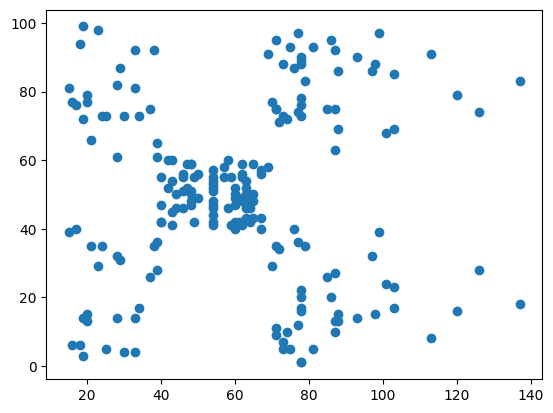

In [855]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

### Determinando o número ideal de clusters e aplicando o clustering K-means

In [856]:
valor_inicial = 1
valor_final = 16

wcss2D = [] # Soma dos quadrados dentro do cluster
wcss3D = []
for i in range(valor_inicial, valor_final):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit_predict(x)
    wcss2D.append(kmeans.inertia_)

    kmeans.fit_predict(features)
    wcss3D.append(kmeans.inertia_)

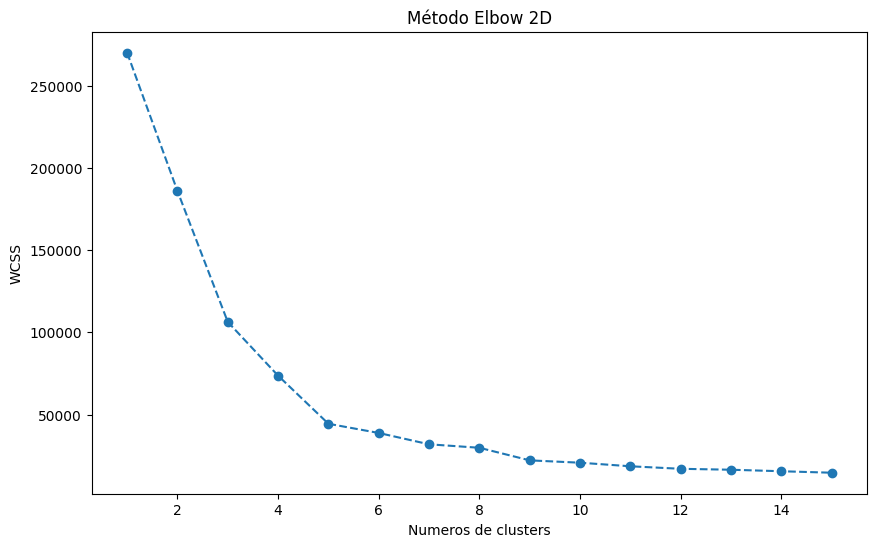

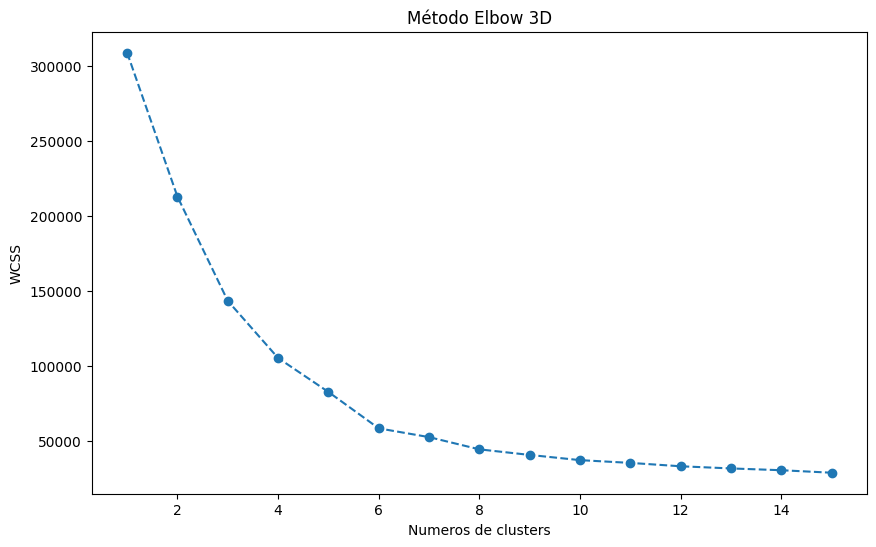

In [857]:
# Traçando o gráfico do método Elbow

plt.figure(figsize=(10, 6))
plt.plot(range(valor_inicial, valor_final), wcss2D, marker='o', linestyle='--')
plt.title('Método Elbow 2D')
plt.xlabel('Numeros de clusters')
plt.ylabel('WCSS')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(valor_inicial, valor_final), wcss3D, marker='o', linestyle='--')
plt.title('Método Elbow 3D')
plt.xlabel('Numeros de clusters')
plt.ylabel('WCSS')
plt.show()

In [858]:
# Com base no método do cotovelo, escolhemos o número ideal de clusters

valor_ideal_clusters2D = 5
valor_ideal_clusters3D = 6


In [859]:
# Aplicando clustering K-means com o número ideal de clusters

kmeans = KMeans(n_clusters=valor_ideal_clusters2D, random_state=0)
y_predict= kmeans.fit_predict(x)

### Visualização 2D

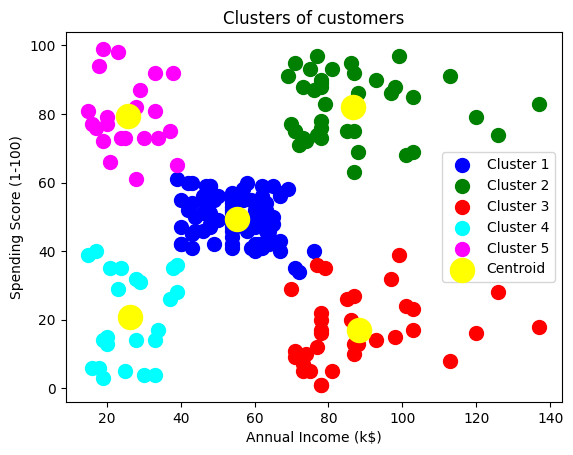

In [860]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Visualize os Clusters em Gráfico 3D

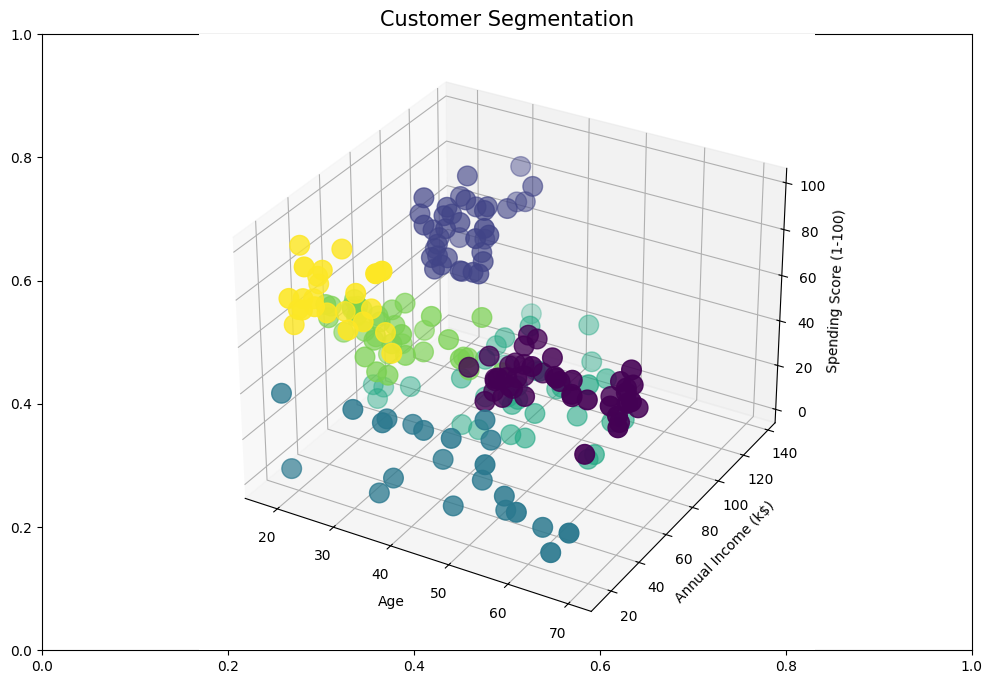

In [861]:
# Visualização dos clusters (assumindo gráfico 3D para Idade, Renda Anual e Pontuação de Gastos)

kmeans = KMeans(n_clusters=valor_ideal_clusters3D, random_state=0)
cluster_labels = kmeans.fit_predict(features)


fig = plt.figure(figsize=(12, 8))
plt.title("Customer Segmentation", fontsize = 15)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=200)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

### Visualizações adicionais para análise de cluster
#### Pairplot:

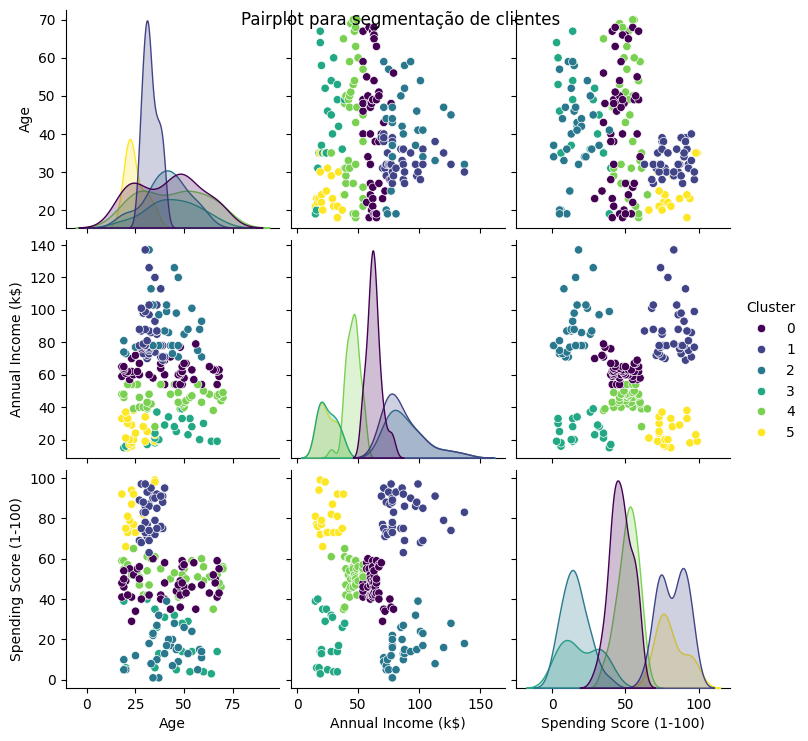

In [862]:
# Atribuindo os rótulos do cluster a uma nova coluna do dataframe

df['Cluster'] = kmeans.fit_predict(x)

# Criando o gráfico com pairplot

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot para segmentação de clientes')
plt.show()

#### Box Plot:

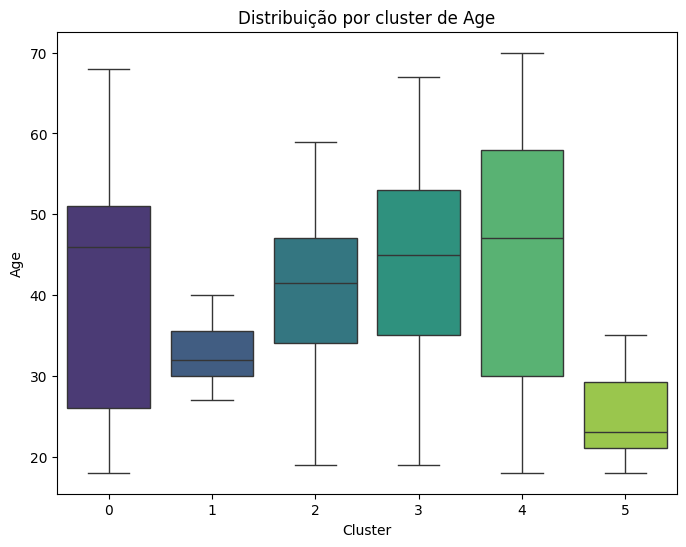

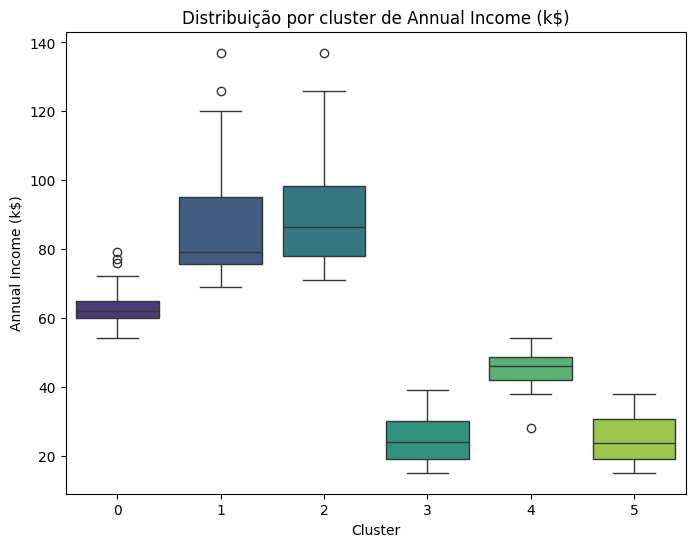

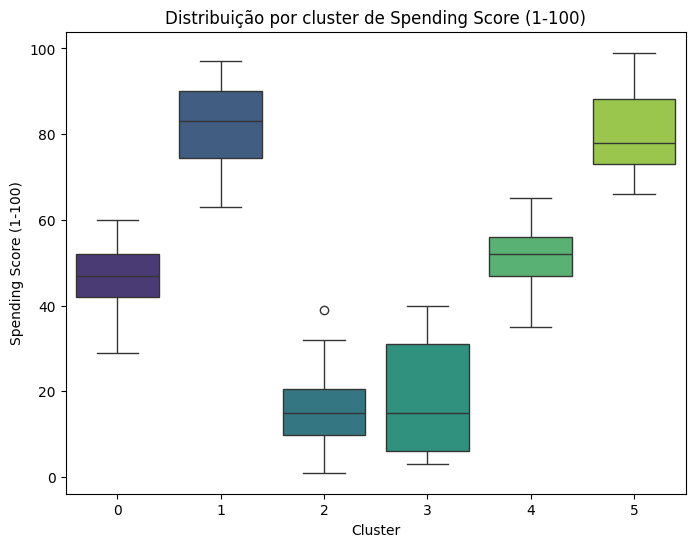

In [863]:
for feature in features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Distribuição por cluster de {feature}')
    plt.show()

#### Silhouette Plot:

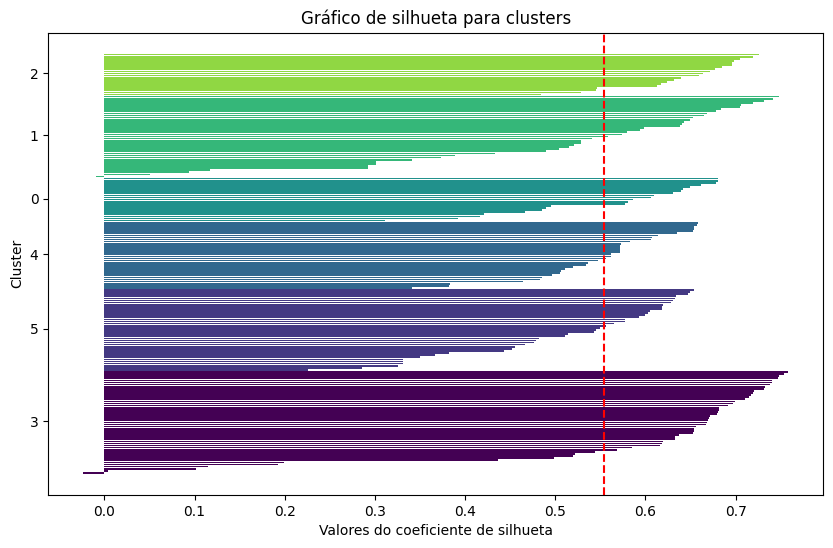

In [864]:
# Gráfico de silhueta para avaliar a qualidade do cluster

silhouette_vals = silhouette_samples(x, y_predict)
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(sorted(df['Cluster'].unique())):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / len(df['Cluster'].unique()))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, df['Cluster'].unique())
plt.ylabel('Cluster')
plt.xlabel('Valores do coeficiente de silhueta')
plt.title('Gráfico de silhueta para clusters')
plt.show()

In [865]:
# Calcular pontuações de silhueta

silhouette_avg = silhouette_score(x, y_predict)
silhouette_vals = silhouette_samples(x, y_predict)

# Imprima a pontuação média da silhueta

print(f'Average Silhouette Score: {silhouette_avg:.2f}')

# Imprimir pontuação de silhueta para cada amostra (opcional)

for i in range(valor_ideal_clusters2D):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    print(f'Silhouette Score for Cluster {i}: {np.mean(cluster_silhouette_vals):.2f}')

Average Silhouette Score: 0.55
Silhouette Score for Cluster 0: 0.62
Silhouette Score for Cluster 1: 0.51
Silhouette Score for Cluster 2: 0.53
Silhouette Score for Cluster 3: 0.52
Silhouette Score for Cluster 4: 0.56


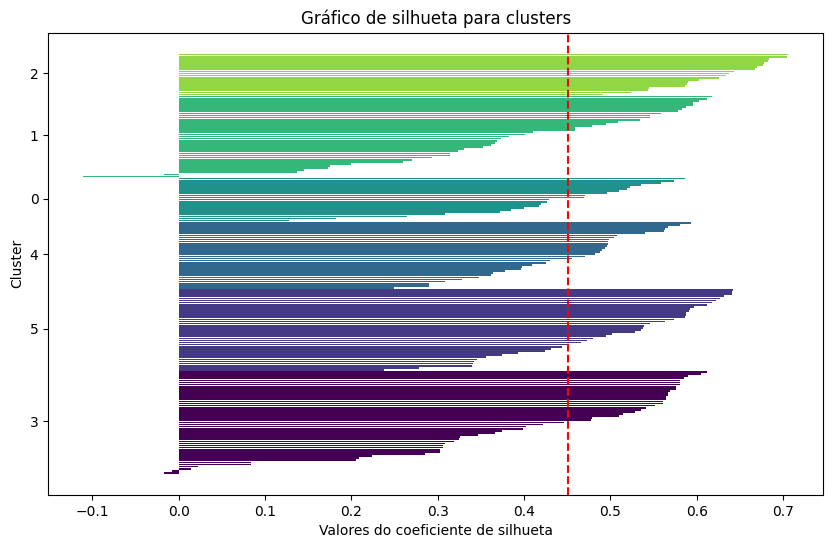

In [866]:
# Gráfico de silhueta para avaliar a qualidade do cluster

silhouette_vals = silhouette_samples(features, cluster_labels)
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(sorted(df['Cluster'].unique())):
    cluster_silhouette_vals = silhouette_vals[df['Cluster'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.viridis(float(i) / len(df['Cluster'].unique()))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, df['Cluster'].unique())
plt.ylabel('Cluster')
plt.xlabel('Valores do coeficiente de silhueta')
plt.title('Gráfico de silhueta para clusters')
plt.show()

In [867]:
def print_silhouette_scores(features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_vals = silhouette_samples(features, cluster_labels)

    print(f'Average Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}')
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        print(f'Silhouette Score for Cluster {i}: {np.mean(cluster_silhouette_vals):.2f}')
    print('\n')

In [868]:
for n_clusters in [4, 5, 6]:
    print_silhouette_scores(features, n_clusters)

Average Silhouette Score for 4 clusters: 0.41
Silhouette Score for Cluster 0: 0.29
Silhouette Score for Cluster 1: 0.44
Silhouette Score for Cluster 2: 0.58
Silhouette Score for Cluster 3: 0.51


Average Silhouette Score for 5 clusters: 0.44
Silhouette Score for Cluster 0: 0.42
Silhouette Score for Cluster 1: 0.53
Silhouette Score for Cluster 2: 0.37
Silhouette Score for Cluster 3: 0.60
Silhouette Score for Cluster 4: 0.43


Average Silhouette Score for 6 clusters: 0.45
Silhouette Score for Cluster 0: 0.39
Silhouette Score for Cluster 1: 0.41
Silhouette Score for Cluster 2: 0.50
Silhouette Score for Cluster 3: 0.44
Silhouette Score for Cluster 4: 0.42
Silhouette Score for Cluster 5: 0.58


